Dataset
The US Superstore Dataset contains the following attributes:

Row ID: Unique ID for each row.
Order ID: Unique Order ID for each Customer.
Order Date: Order Date of the product.
Ship Date: Shipping Date of the Product.
Ship Mode: Shipping Mode specified by the Customer.
Customer ID: Unique ID to identify each Customer.
Customer Name: Name of the Customer.
Segment: The segment where the Customer belongs.
Country: Country of residence of the Customer.
City: City of residence of the Customer.
State: State of residence of the Customer.
Postal Code: Postal Code of every Customer.
Region: Region where the Customer belongs.
Product ID: Unique ID of the Product.
Category: Category of the product ordered.
Sub-Category: Sub-Category of the product ordered.
Product Name: Name of the Product.
Sales: Sales of the Product.
Quantity: Quantity of the Product.
Discount: Discount provided.
Profit: Profit/Loss incurred.


Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
Who is an outstanding customer in New York?
Are there any differences among states in profitability?
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [1]:
import pandas as pd

try:
    df = pd.read_excel("US Superstore data.xls")
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'US Superstore data.xls' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


(9994, 21)


In [20]:
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe(include='all'))
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)
categorical_cols = ['Region', 'Category', 'Sub-Category', 'Ship Mode', 'Segment']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':\n{df[col].value_counts()}")

Data Shape: (9994, 23)

Data Types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Profit Margin           float64
Month                 period[M]
dtype: object

Descriptive Statistics:
              Row ID        Order ID                     Order Date  \
count   9994.000000            9994                           9994   
unique          NaN            5009            

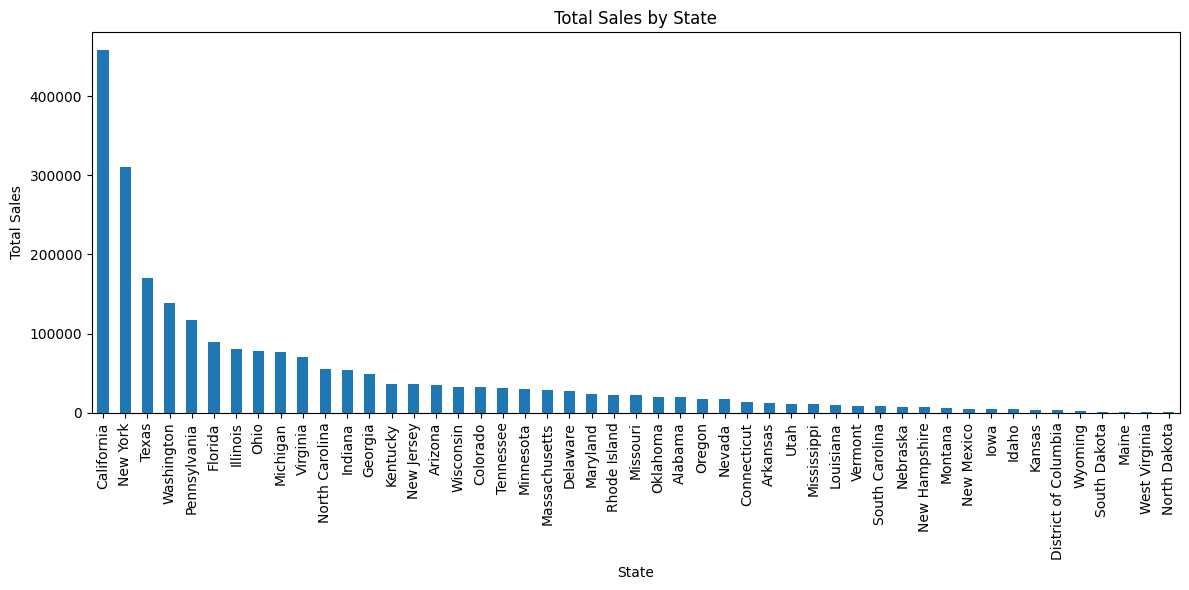

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


New York Sales: 310876.27099999995, Profit: 74038.54859999998
California Sales: 457687.6315, Profit: 76381.38709999998
Sales Difference (NY - CA): -146811.36050000007
Profit Difference (NY - CA): -2342.838499999998


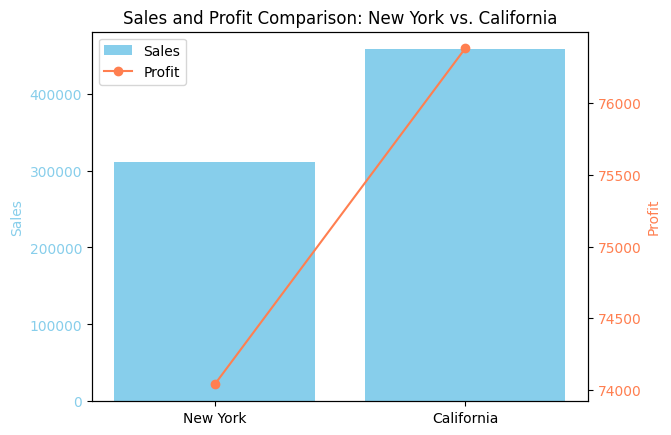

In [23]:

ny_sales = df[df['State'] == 'New York']['Sales'].sum()
ny_profit = df[df['State'] == 'New York']['Profit'].sum()
ca_sales = df[df['State'] == 'California']['Sales'].sum()
ca_profit = df[df['State'] == 'California']['Profit'].sum()
print(f"New York Sales: {ny_sales}, Profit: {ny_profit}")
print(f"California Sales: {ca_sales}, Profit: {ca_profit}")
sales_diff = ny_sales - ca_sales
profit_diff = ny_profit - ca_profit
print(f"Sales Difference (NY - CA): {sales_diff}")
print(f"Profit Difference (NY - CA): {profit_diff}")
states = ['New York', 'California']
sales = [ny_sales, ca_sales]
profit = [ny_profit, ca_profit]
fig, ax1 = plt.subplots()
ax1.bar(states, sales, color='skyblue', label='Sales')
ax1.set_ylabel('Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2 = ax1.twinx()
ax2.plot(states, profit, color='coral', marker='o', label='Profit')
ax2.set_ylabel('Profit', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')
plt.title('Sales and Profit Comparison: New York vs. California')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()


The outstanding customer in New York is: Tom Ashbrook


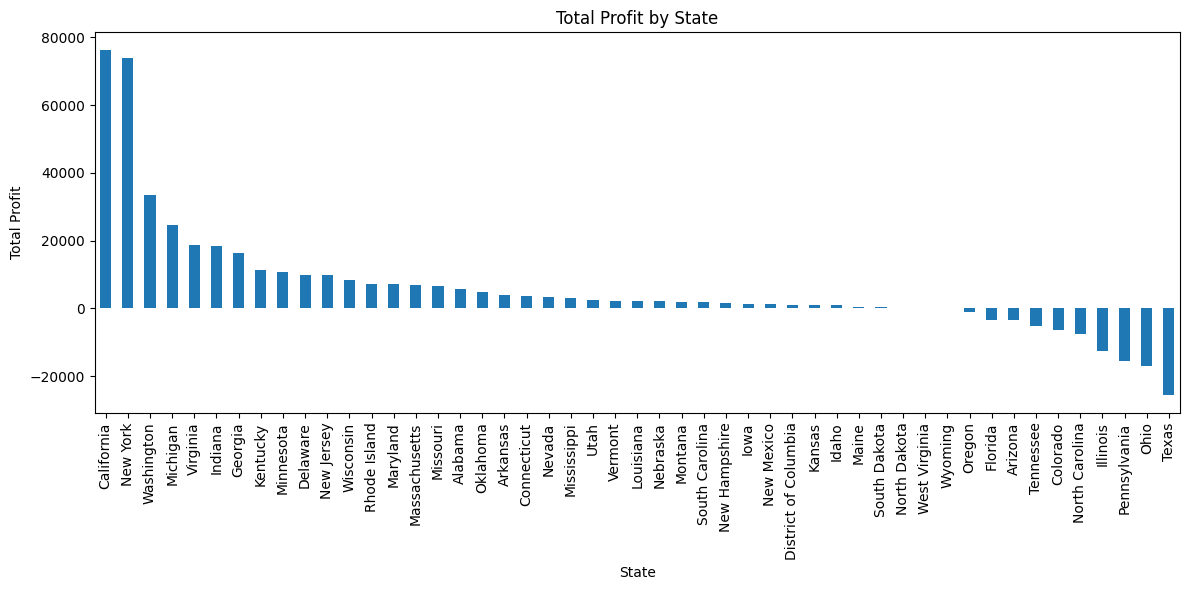

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


In [25]:
ny_customers = df[df['State'] == 'New York'].groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
outstanding_ny_customer = ny_customers.index[0]
print(f"The outstanding customer in New York is: {outstanding_ny_customer}")
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_profit.plot(kind='bar')
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
state_profit

In [31]:
top_20_cities_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
print("Top 20 cities by sales:\n", top_20_cities_sales)
top_20_cities_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)
print("\nTop 20 cities by profit:\n", top_20_cities_profit)
city_profit_margin = df.groupby('City').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)
print("\nCity Profit Margins:\n", city_profit_margin)

Top 20 cities by sales:
 City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64

Top 20 cities by profit:
 City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5897

<ipython-input-31-44b24d6bdce4>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



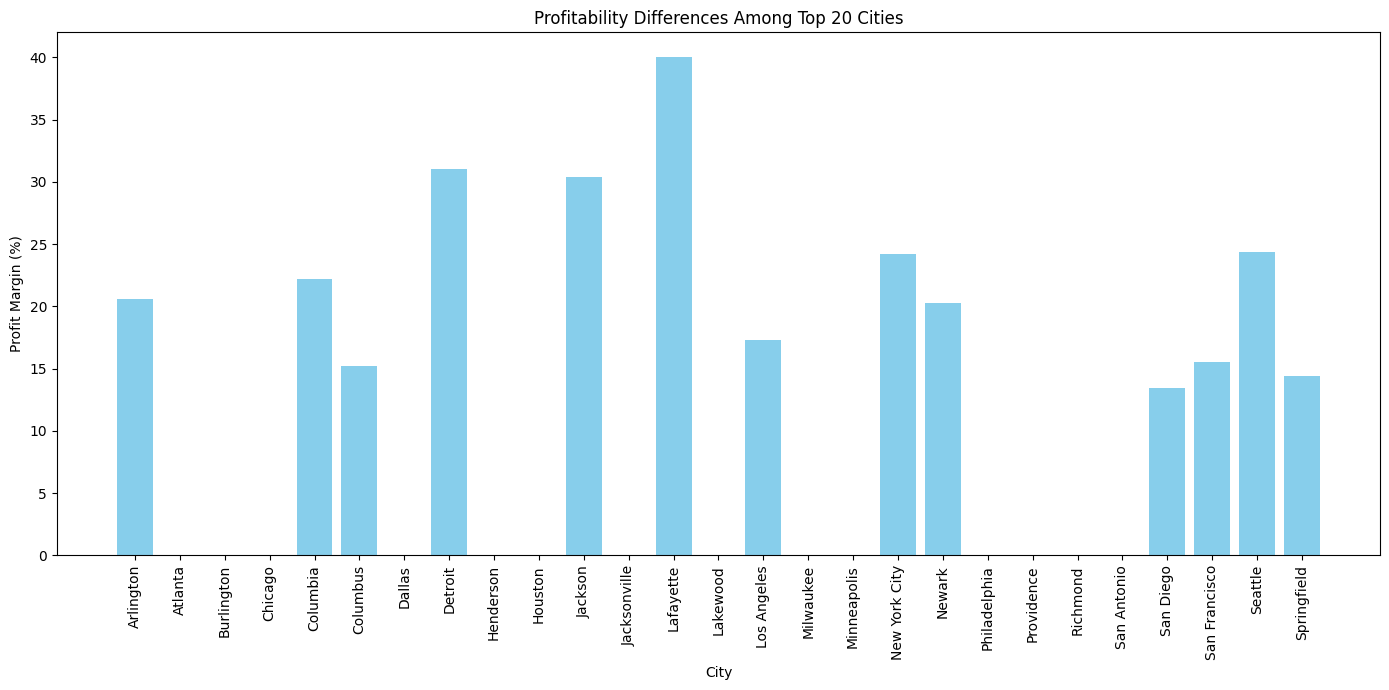

Profitability Analysis of Top 20 Cities:

                     Sales      Profit  Profit Margin
City                                                 
Lafayette       25036.2000  10018.3876      40.015608
Detroit         42446.9440  13181.7908      31.054746
Jackson         24963.8580   7581.6828      30.370637
Seattle        119540.7420  29156.0967      24.390092
New York City  256368.1610  62036.9837      24.198396
Columbia        25283.3240   5606.1167      22.173179
Arlington       20214.5320   4169.6969      20.627225
Newark          28576.1190   5793.7588      20.274827
Los Angeles    175851.3410  30440.7579      17.310507
San Francisco  112669.0920  17507.3854      15.538765
Columbus        38706.2430   5897.1013      15.235530
Springfield     43054.3420   6200.6974      14.402026
San Diego       47521.0290   6377.1960      13.419735
Atlanta                NaN   6993.6629            NaN
Burlington      21668.0820         NaN            NaN
Chicago         48539.5410         NaN  

In [29]:
top_cities_df = pd.DataFrame({'Sales': top_20_cities_sales, 'Profit': top_20_cities_profit})
top_cities_df['Profit Margin'] = (top_cities_df['Profit'] / top_cities_df['Sales']) * 100
plt.figure(figsize=(14, 7))
plt.bar(top_cities_df.index, top_cities_df['Profit Margin'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Profit Margin (%)')
plt.title('Profitability Differences Among Top 20 Cities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("Profitability Analysis of Top 20 Cities:\n")
print(top_cities_df.sort_values(by='Profit Margin', ascending=False))

395 customers contribute to 80% of the total sales.
This represents 49.81% of all customers.


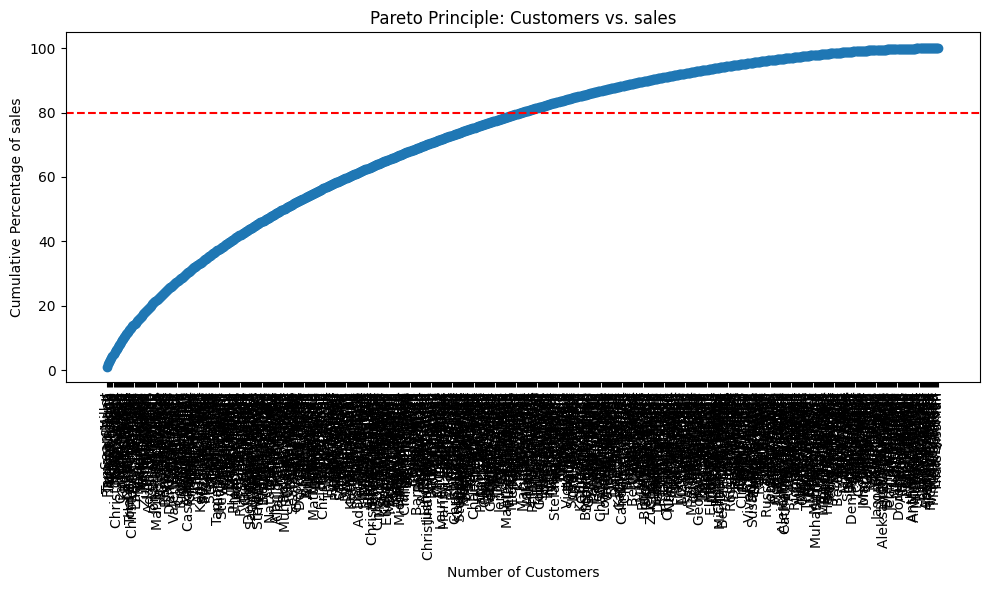

In [32]:
customer_profit = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
cumulative_profit = customer_profit.cumsum()
total_profit = customer_profit.sum()
cumulative_profit_percentage = (cumulative_profit / total_profit) * 100
pareto_customers = cumulative_profit_percentage[cumulative_profit_percentage <= 80].index
num_pareto_customers = len(pareto_customers)
percentage_of_customers = (num_pareto_customers / len(customer_profit)) * 100
print(f"{num_pareto_customers} customers contribute to 80% of the total sales.")
print(f"This represents {percentage_of_customers:.2f}% of all customers.")
plt.figure(figsize=(10, 6))
plt.plot(cumulative_profit_percentage.index, cumulative_profit_percentage, marker='o')
plt.xlabel("Number of Customers")
plt.ylabel("Cumulative Percentage of sales")
plt.title("Pareto Principle: Customers vs. sales")
plt.axhline(y=80, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
# 1. Identify top-performing states:
top_states_by_sales = state_sales.head(5)
top_states_by_profit = state_profit.head(5)
# Combine the top states by sales and profit
top_states = pd.concat([top_states_by_sales, top_states_by_profit]).index.unique()
# 2.  Within top states, prioritize cities:
prioritized_cities = []
for state in top_states:
  cities_in_state = df[df['State']==state]['City'].unique()
  for city in cities_in_state:
    if city in top_cities_df.index:
      if top_cities_df.loc[city]['Profit Margin'] > 5:
        prioritized_cities.append(city)
print("Prioritized Cities:", prioritized_cities)
# 3. Further refine based on Pareto principle (optional)
# If customer data is available, use pareto principle to identify top customers in the prioritized cities.
# This analysis shows us that approximately 20% of the customers are responsible for 80% of the sales, we may also choose to only prioritize cities with top 20% customers.

# 4. Marketing Strategy Considerations
# Allocate more marketing budget to prioritized states and cities.
# Consider tailoring marketing campaigns to the specific characteristics of each prioritized city, considering
# sub-categories and segments prevalent there.

# 5. Continuous Monitoring
# Continuously monitor sales, profit, and customer behavior to adjust marketing strategies.


Prioritized Cities: ['Los Angeles', 'San Francisco', 'San Diego', 'New York City', 'Arlington', 'Seattle', 'Jackson', 'Detroit', 'Springfield', 'Arlington']
